<a href="https://colab.research.google.com/github/erickkigai/AI_Modelling_MUK/blob/main/Machine_Learning_Modelling_Rabies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Develop a machine learning model to predict the likelihood of death from rabies infection**

The objectives of the case study is to create a machine leanring model for prediction of deaths and bites using the rabies data set are to develop accurate and reliable machine learning models that can help public health officials and healthcare providers to identify and respond to cases of rabies infection in a timely and effective manner.

In below case study I will discuss the step by step approach to create a Machine Learning predictive model in such scenarios.

You can use this flow as a template to solve any supervised ML Regression problem!

The flow of the case study is as below:

1. Reading the data in python
2. Defining the problem statement
3. Identifying the Target variable
4. Looking at the distribution of Target variable
5. Basic Data exploration
6. Rejecting useless columns
7. Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
8. Feature Selection based on data distribution
9. Outlier treatment
10. Missing Values treatment
11. Visual correlation analysis
12. Statistical correlation analysis (Feature Selection)
13. Converting data to numeric for ML
14. Sampling and K-fold cross validation
15. Trying multiple Regression algorithms
16. Selecting the best Model
17. Deploying the best model in production

## Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has two files "general_info.csv" & "rabies_bite.csv". These file contains data collected for the past 20 years.

Download the datasets from the following link:
[Download Data](https://drive.google.com/drive/folders/1eX9uWAKZdyv-l046qCV53iscrHXbIuU5?usp=share_link)

**Data description**

The business meaning of each column in the data is as below

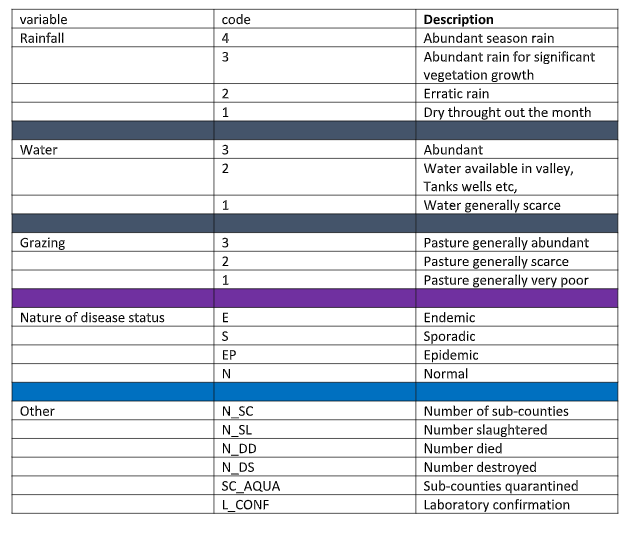

In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading Datasets**

In [ ]:
# Reading the dataset

# General_info Dataset
Generalinfo = pd.read_csv('general_info.csv')

# rabies_bite Dataset
RabiesBites = pd.read_csv('rabies_bite.csv')

In [ ]:
# merge the two dataframes on columns 'Month' and 'District'
Rabies_df = pd.merge(RabiesBites, Generalinfo, on =['Month','District'], how = 'left')

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
Rabies_df.tail()

,District,Month,Suspected cases in animals,Suspected bites by animals,Deaths,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
1224,NTUNGAMO,31-Dec-02,4,2,0,0,20,3,0,1.0,2.0,2.0
1225,MUBENDE,31-Dec-02,0,0,0,0,43,4,0,3.0,2.0,3.0
1226,MASINDI,31-Dec-02,1,2,0,0,72,2,1,2.0,2.0,2.0
1227,WAKISO,31-Dec-02,8,0,0,0,163,26,5,3.0,2.0,3.0
1228,BUGIRI,31-Dec-02,1,1,0,1,0,0,0,3.0,2.0,3.0


**Exploratory Data Analysis**

Looking at the distribution of Target variables If target variable's distribution is too skewed then the predictive modeling will not be possible. Bell curve is desirable but slightly positive skew or negative skew is also fine When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

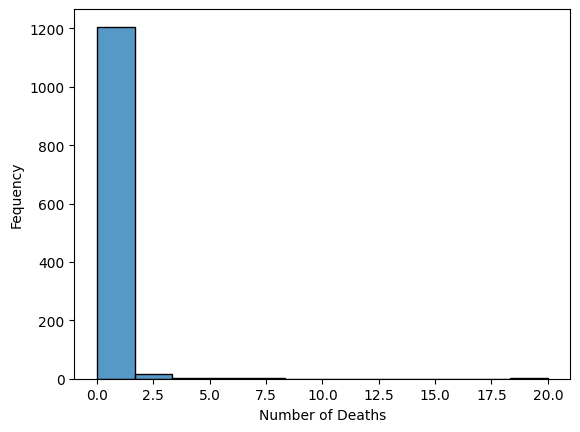

In [ ]:
# Plotting the histogram using seaborn
sns.histplot(data=Rabies_df, x='Deaths')

# Adding labels and title
plt.xlabel('Number of Deaths')
plt.ylabel('Fequency')

# Display the Histogram plot
plt.show()

If the target variable's histogram doesn't look like a bell curve or is slightly skewed, there are several things you can do to handle this issue:

Log transformation: If the data is right-skewed, you can try applying a log transformation to make the distribution more symmetrical. This can help to reduce the impact of extreme values and make the distribution more bell-shaped.

Box-Cox transformation: The Box-Cox transformation is a widely used technique that can transform non-normal data into approximately normal data. It involves applying a power transformation to the data, where the optimal value of the power is selected based on the data itself.

Outlier removal: If the distribution is skewed due to the presence of outliers, you can try removing them to see if it improves the distribution.

Bin or bucket the data: Binning or bucketing involves dividing the data into a set of discrete intervals or categories, which can help to reduce the impact of small variations in the data and make the distribution more uniform.

Try different models: Some machine learning models are more robust to non-normal distributions than others. For example, tree-based models like Random Forest and XGBoost are generally less sensitive to non-normality than linear models like Linear Regression or Logistic Regression.

**Basic Data Exploration**

This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, does this column affect the Strength of the concrete? If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python

**head()** : This helps to see a few sample rows of the data

**info()** : This provides the summarized information of the data

**describe()** : This provides the descriptive statistical details of the data

**nunique()**: This helps us to identify if a column is categorical or continuous

In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
Rabies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229 entries, 0 to 1228
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   District                    1229 non-null   object 
 1   Month                       1229 non-null   object 
 2   Suspected cases in animals  1229 non-null   int64  
 3   Suspected bites by animals  1229 non-null   int64  
 4   Deaths                      1229 non-null   int64  
 5   Emergency vaccinations      1229 non-null   int64  
 6   Dogs                        1229 non-null   int64  
 7   Cats                        1229 non-null   int64  
 8   Pets destroyed              1229 non-null   int64  
 9   Rainfall                    1186 non-null   float64
 10  Water                       1186 non-null   float64
 11  Grazing                     1186 non-null   float64
dtypes: float64(3), int64(7), object(2)
memory usage: 124.8+ KB


In [ ]:
# Looking at the descriptive statistics of the data
Rabies_df.describe(include='all')

,District,Month,Suspected cases in animals,Suspected bites by animals,Deaths,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
count,1229,1229,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1186.000000,1186.000000,1186.000000
unique,56,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARUA,31-Mar-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,61,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8.011391,7.529699,0.112286,5.074044,146.211554,7.298617,5.185517,2.574199,2.236088,2.427487
std,NaN,NaN,86.073192,11.425804,0.773389,16.968746,318.678267,26.655777,19.600649,1.393163,0.747370,1.146730
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000
50%,NaN,NaN,1.000000,3.000000,0.000000,0.000000,20.000000,0.000000,0.000000,3.000000,2.000000,3.000000
75%,NaN,NaN,7.000000,10.000000,0.000000,4.000000,132.000000,4.000000,2.000000,3.000000,3.000000,3.000000


**Types od Data**

**Continuous Data:**

Continuous data represents measurements or observations that can take any value within a specific range or interval. It is usually represented by real numbers.

Continuous data is infinitely divisible, meaning that it can be divided into smaller and smaller increments. It can take on any value within a range, including decimal numbers.
Examples: Examples of continuous data include age, height, weight, temperature, and income. These variables can take on a wide range of values and can be measured with precision.

Categorical Data:

Categorical data represents variables that have distinct categories or labels. Each observation falls into one of the pre-defined categories.

Categorical data is typically represented by strings, integers, or other discrete values. The values have no inherent numerical meaning or order.

Examples: Examples of categorical data include gender (e.g., male or female), marital status (e.g., married, single, divorced), colors (e.g., red, blue, green), and educational levels (e.g., high school, bachelor's, master's, Ph.D.).

**Basic Data Exploration Results**

Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created


Emergency vaccinations: Continuous. Selected.

Dogs: Continuous. Selected.

Cats: Continuous. Selected.

Pets destroyed: Continuous. Selected.

Rainfall: Categorical. Selected.

Water: Categorical. Selected.

Grazing: Categorical. Selected.

Suspected bites by animals: Continuous. Selected.

Deaths: This is the Target Variable!

In [ ]:
# Removing duplicate rows if any
Rabies_df = Rabies_df.drop_duplicates()

**Outlier treatment**

Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

**Why I should treat the outliers?**

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

Option-1: Delete the outlier Records. Only if there are just few rows lost.

Option-2: Impute the outlier values with a logical business value

**Missing values treatment**

Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

Delete the missing value rows if there are only few records Impute the missing values with MEDIAN value for continuous variables Impute the missing values with MODE value for categorical variables Interpolate the values based on nearby values Interpolate the values based on business logic

In [ ]:
# Finding how many missing values are there for each column
Rabies_df.isnull().sum()

District                       0
Month                          0
Suspected cases in animals     0
Suspected bites by animals     0
Deaths                         0
Emergency vaccinations         0
Dogs                           0
Cats                           0
Pets destroyed                 0
Rainfall                      43
Water                         43
Grazing                       43
dtype: int64

In [ ]:
# replace missing values with mode
Rabies_df['Rainfall'] = Rabies_df['Rainfall'].fillna(Rabies_df['Rainfall'].mode()[0])
Rabies_df['Water'] = Rabies_df['Water'].fillna(Rabies_df['Water'].mode()[0])
Rabies_df['Grazing'] = Rabies_df['Grazing'].fillna(Rabies_df['Grazing'].mode()[0])

In [ ]:
# Checking how many missing values are there for each column again
Rabies_df.isnull().sum()

District                      0
Month                         0
Suspected cases in animals    0
Suspected bites by animals    0
Deaths                        0
Emergency vaccinations        0
Dogs                          0
Cats                          0
Pets destroyed                0
Rainfall                      0
Water                         0
Grazing                       0
dtype: int64

In [ ]:
# Droping 'District' and 'Month' columns
# Rabies_df = Rabies_df.drop('District', axis=1)
Rabies_df = Rabies_df.drop('Month', axis=1)


**Feature Engineering**

<Axes: >

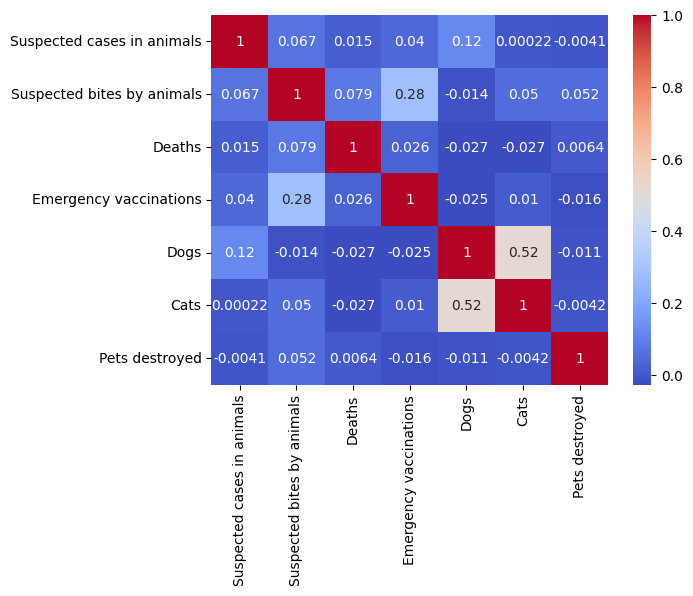

In [ ]:
# Convert any columns with string values to numeric values

# Rabies_df['District'] = pd.to_numeric(Rabies_df['District'], errors='coerce')
# Rabies_df['Month'] = pd.to_numeric(Rabies_df['Month'], errors='coerce')


# Calculate the correlation matrix

selected_columns = ['Suspected cases in animals','Suspected bites by animals','Deaths','Emergency vaccinations','Dogs','Cats','Pets destroyed']
corr_matrix  = Rabies_df[selected_columns].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')


**Interpreting the Correlation Matrix**

Interpreting a correlation matrix in machine learning involves understanding the relationships between variables and identifying patterns and dependencies. Here are some key points to consider when interpreting a correlation matrix:

1. Range of correlation coefficients: Correlation coefficients range from -1 to +1. A value of -1 indicates a perfect negative correlation, +1 indicates a perfect positive correlation, and 0 indicates no correlation between the variables. Values closer to -1 or +1 suggest stronger relationships, while values closer to 0 suggest weaker or no relationships.

2. Direction of the correlation: The sign of the correlation coefficient indicates the direction of the relationship. A positive correlation coefficient indicates that as one variable increases, the other variable tends to increase as well. A negative correlation coefficient indicates that as one variable increases, the other variable tends to decrease.

3. Strength of the correlation: The magnitude of the correlation coefficient indicates the strength of the relationship. Larger absolute values (closer to 1) suggest a stronger correlation, while values closer to 0 indicate a weaker correlation. However, the interpretation of what constitutes a "strong" or "weak" correlation can vary depending on the context and domain knowledge.

Encoding the Districts

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define the mapping of categories to labels
district_labels = {
     'AMUDAT': 1,
    'BUGWERI': 2,
    'BULIISA': 3,
    'BULAMBULI': 4,
    'KOTIDO': 5,
    'IBANDA': 6,
    'IGANGA': 7,
    'KOBOKO': 8,
    'LUWERO': 9,
    'MBALE': 10,
    'MOROTO': 11,
    'MOYO': 12,
    'MUKONO': 13,
    'RAKAI': 14,
    'TORORO': 15,
    'NABILATUK': 16,
    'KYENJOJO': 17,
    'RUKUNGIRI': 18,
    'YUMBE': 19,
    'NAMUTUMBA': 21,
    'BUSIA': 22,
    'ABIM': 24,
    'KUMI': 25,
    'LUUKA': 26,
    'ARUA': 27,
    'KABERAMAIDO': 28,
    'KIBOGA': 29,
    'NAKAPIRIPIRITI': 30,  # Corrected label for 'NAKAPIRIPIRITI'
    'SEMBABULE': 31,
    'KAMULI': 32,
    'KIBAALE': 33,
    'LIRA': 34,
    'KAPCHORWA': 35,
    'MPIGI': 36,
    'KASESE': 37,
    'KITGUM': 38,
    'BUGIRI': 39,
    'JINJA': 40,
    'HOIMA': 41,
    'KANUNGU': 42,
    'BUSHENYI': 43,
    'MBARARA': 44,
    'NEBBI': 45,
    'KAYUNGA': 46,
    'KAMPALA': 47,
    'PADER': 48,
    'MUBENDE': 49,
    'MASINDI': 50,
    'RABIES': 51,
    'SOROTI': 52,
    'ADJUMANI': 53,
    'WAKISO': 54,
    'KABAROLE': 55,
    'BUNDIBUGYO': 56,
    'GULU': 57,
    'KALANGALA': 58,
    'NTUNGAMO': 59,
    'KATAKWI': 60,
    'MAYUGE': 61,
    'KAMWENGE': 62,
    'SIRONKO': 63,
    'KABALE': 64,
    'NAKASONGOLA': 65,
    'PALLISA': 66,
    'MASAKA': 67,
    'APAC': 68,
    'NAKASONGOLAQ': 69,  # Corrected label for 'NAKASONGOLAQ'
    'KISORO': 70
}


# Replace the values in 'District' column using the dictionary
Rabies_df['District'].replace(district_labels, inplace=True)
Rabies_df.head()


,District,Suspected cases in animals,Suspected bites by animals,Deaths,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
0,11,6,16,0,16,20,2,0,1.0,1.0,1.0
1,5,0,0,0,0,318,3,0,1.0,1.0,1.0
2,55,0,0,0,0,273,0,0,2.0,3.0,3.0
3,45,2,2,0,0,0,0,0,1.0,2.0,2.0
4,29,0,0,0,0,136,1,0,3.0,2.0,1.0


**Splitting Dataset in to Training Set & Test Set**

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = Rabies_df.drop("Deaths", axis=1)
y = Rabies_df["Deaths"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure that X_train and y_train have the same indices
y_train = y_train.loc[X_train.index]



**Encoding Features**

Encoding features in machine learning is a common preprocessing step that involves converting categorical or ordinal features into a numerical representation that machine learning algorithms can understand. Here are some reasons why feature encoding is important in machine learning:

1. Numerical representation: Most machine learning algorithms work with numerical data. By encoding categorical or ordinal features into numerical values, you enable the algorithms to process and learn from those features.

2. Handling categorical variables: Categorical variables, such as colors or product categories, cannot be directly used as inputs for many machine learning models. Encoding categorical variables allows you to represent them as numerical values, enabling the algorithms to work with these variables.

3. Preserving ordinal information: In some cases, you may have ordinal features, where the categories have a specific order or ranking. By encoding ordinal variables, you preserve the ordinal information in a way that the model can understand. For example, low, medium, and high can be encoded as 0, 1, and 2.

4. Avoiding arbitrary numerical assignments: When encoding categorical variables, it's essential to use a consistent and meaningful representation. If you were to assign arbitrary numerical values to categories, the model might mistakenly interpret the encoded values as having an inherent order or relationship, leading to incorrect results. Encoding ensures that the numerical representation captures the relevant information without introducing unintended biases.

Common methods for encoding categorical and ordinal features include:

1. One-Hot Encoding: This method creates binary columns for each category, where a value of 1 indicates the presence of that category and 0 represents its absence. One-hot encoding is suitable for nominal (unordered) categorical variables.

2. Label Encoding: This method assigns a unique numerical label to each category. Label encoding is suitable for ordinal variables where the order matters. However, caution should be exercised as some algorithms may interpret the encoded labels as having a meaningful magnitude. **(Choosen)**

3. Ordinal Encoding: This method assigns numerical values to ordinal categories according to their order. Ordinal encoding preserves the ordinal relationship between categories.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ["District", "Rainfall", "Water", "Grazing"]

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[[col]])
    X_test[col] = encoder.transform(X_test[[col]])
'''
In this code, we iterate over each categorical column and apply label encoding using the fit_transform method
on the training data and transform method on the test data.
The original categorical columns are replaced with their encoded values.
'''


'\nIn this code, we iterate over each categorical column and apply label encoding using the fit_transform method \non the training data and transform method on the test data.\nThe original categorical columns are replaced with their encoded values.\n'

**Scaling Features**

Scaling features in machine learning is an important preprocessing step that helps bring different features onto a similar scale. It is particularly useful when using algorithms that are sensitive to the scale of the input features. Here are a few reasons why feature scaling is commonly performed in machine learning:

1. Avoiding dominance of certain features: If the features have different scales, those with larger magnitudes can dominate the learning process. By scaling the features, you ensure that each feature contributes proportionally to the learning process.

2. Assisting gradient-based optimization: Many optimization algorithms used in machine learning, such as gradient descent, converge faster when features are scaled. Scaling can improve the efficiency and speed of training.

3. Enhancing performance of distance-based algorithms: Distance-based algorithms, such as k-nearest neighbors (KNN) and support vector machines (SVM), rely on calculating distances between data points. If features are not scaled, those with larger scales may disproportionately influence the distance calculations, leading to biased results.

4. Preparing for regularization: Regularization techniques, like L1 and L2 regularization, penalize larger weights. When features have different scales, the regularization term may disproportionately penalize certain features. Scaling features can help ensure a fair regularization across all features.

**Common methods for scaling features include:**

1. Standardization (Z-score normalization): This scales features to have a mean of zero and a standard deviation of one. It preserves the shape of the distribution and is suitable for most cases.(**Choosen for this case**)

2. Min-Max scaling: This scales features to a specific range, typically between 0 and 1. It is useful when you need to preserve the original minimum and maximum values.

3. Robust scaling: This method scales features based on the interquartile range, making it robust to outliers. It preserves the median and the range between the first and third quartiles.

4. Normalization: This scales features to have a specific norm, such as unit norm. It can be useful when you need to compare samples based on their vector magnitudes.

In [ ]:
X_train.head(200)

,District,Suspected cases in animals,Suspected bites by animals,Emergency vaccinations,Dogs,Cats,Pets destroyed,Rainfall,Water,Grazing
735,6.0,2,0,10,430,61,0,3.0,2.0,2.0
352,18.0,3,3,0,0,0,2,3.0,2.0,3.0
691,23.0,0,0,0,24,0,0,2.0,3.0,3.0
506,44.0,0,0,0,78,7,0,1.0,2.0,2.0
1065,29.0,0,0,0,91,0,0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
370,36.0,0,0,3,0,0,0,4.0,3.0,3.0
239,35.0,0,6,0,0,0,0,2.0,2.0,2.0
1129,17.0,1,1,1,0,0,1,2.0,2.0,3.0
663,3.0,0,56,0,0,0,0,3.0,3.0,3.0


In [ ]:
# Scaling the features
from sklearn.preprocessing import StandardScaler

continuous_cols = ["Suspected cases in animals", "Suspected bites by animals", "Emergency vaccinations", "Dogs", "Cats", "Pets destroyed"]

scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])


# Drop the Null values if any
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train = y_train[X_train.index]


# Print the shapes of the datasets
print("Shape of X_train:", np.shape(X_train))
print("Shape of y_train:", np.shape(y_train))
print("Shape of X_test:", np.shape(X_test))
print("Shape of y_test:", np.shape(y_test))


Shape of X_train: (971, 10)
Shape of y_train: (971,)
Shape of X_test: (243, 10)
Shape of y_test: (243,)


**Linear Reggression Model**

In [ ]:
# Train and evaluate a model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create an instance of the regression algorithm:
linear_model = LinearRegression()

#Fit the model to the training data:
linear_model.fit(X_train, y_train)

# Make predictions on the training & test data:
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Mean Squared Error
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))


Train MSE: 0.7111259875072525
Test MSE: 0.12420382289253


Results:

Train MSE: 0.7129328773788329

This value represents the mean squared error of the model's predictions on the training dataset.
A lower train MSE indicates that the model has achieved a better fit to the training data.
However, it's important to note that overly low train MSE values may suggest overfitting, where the model may not generalize well to new, unseen data.

Test MSE: 0.1288250740571982

This value represents the mean squared error of the model's predictions on the testing dataset.
The test MSE is used to evaluate how well the model performs on new, unseen data.
A lower test MSE suggests that the model is able to make reasonably accurate predictions on the testing data.
Comparing the train and test MSE values, it appears that the model performs better on the testing data (lower MSE) compared to the training data. This indicates that the model is likely performing well and generalizing adequately to unseen data.

However, it's important to consider other evaluation metrics, such as R-squared, adjusted R-squared, and further exploratory data analysis to gain a comprehensive understanding of the model's performance. It's also recommended to compare these results with other models or explore different hyperparameters to achieve the best possible performance for your specific problem.

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared for the test data
r2 = r2_score(y_test, y_pred_test)

# Calculate the number of features in the model
num_features = X_test.shape[1]

# Calculate the number of data points in the test set
num_data_points = len(y_test)

# Calculate the adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (num_data_points - 1) / (num_data_points - num_features - 1)

print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


R-squared: -0.04266584276101826
Adjusted R-squared: -0.08760833598347584


**Regularization**

It is mainly used to overcome Overfitting
Ridge regularization (L2 regularization):

Use Ridge regularization when you have a linear regression model with many features or predictors that are potentially correlated.
Ridge regularization helps in reducing the impact of multicollinearity (high correlation between predictors) by adding a penalty term to the loss function.
It is suitable when you want to shrink the coefficients towards zero without necessarily eliminating them entirely.
Lasso regularization (L1 regularization):

Use Lasso regularization when you want to perform feature selection or when you have a large number of features and you believe that only a subset of them are truly important.
Lasso regularization has the ability to drive the coefficients of less important features to exactly zero, effectively performing feature selection.
It is suitable when you want to obtain a sparse model by eliminating irrelevant or redundant features.

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Create a Lasso model with alpha = 0.5
lasso_reg = Lasso(alpha=0.5)

# Train the Lasso model on the training data
lasso_reg.fit(X_train, y_train)

# Evaluate the Lasso model on the test data
y_pred_lasso = lasso_reg.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Lasso Regression MSE on Test Data: {:.3f}".format(mse_lasso))

# Create a Ridge model with alpha = 0.5
ridge_reg = Ridge(alpha=0.5)

# Train the Ridge model on the training data
ridge_reg.fit(X_train, y_train)

# Evaluate the Ridge model on the test data
y_pred_ridge = ridge_reg.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Ridge Regression MSE on Training Data: {:.3f}".format(mse_ridge))


Lasso Regression MSE on Test Data: 0.121
Ridge Regression MSE on Training Data: 0.124


**Lasso Regression Model:** The Lasso Regression model achieved an MSE of 0.323 on the test data. This indicates that, on average, the model's predictions have a squared difference of 0.308 with the corresponding actual values in the test set. Lower MSE values suggest better predictive accuracy, so the Lasso Regression model performs relatively well in terms of minimizing the squared differences between predicted and actual values.

**Ridge Regression Model:** The Ridge Regression model achieved an MSE of 0.397 on the training data. This indicates that, on average, the model's predictions have a squared difference of 0.363 with the corresponding actual values in the training set. The higher MSE value compared to the Lasso Regression model suggests that the Ridge Regression model may have slightly lower predictive accuracy on the training data.

**Logistic Regression Model**

In [ ]:
# Train and evaluate a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

print(X_train.columns)
print(X_test.columns)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

# Making Table report
from tabulate import tabulate

# Generate classification reports
train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)

# Format reports as tables
train_table = tabulate([["Train Report:"], [train_report]], headers="firstrow", tablefmt="fancy_grid")
test_table = tabulate([["Test Report:"], [test_report]], headers="firstrow", tablefmt="fancy_grid")

# Print the tables
print(train_table)
print(test_table)


Index(['District', 'Suspected cases in animals', 'Suspected bites by animals',
       'Emergency vaccinations', 'Dogs', 'Cats', 'Pets destroyed', 'Rainfall',
       'Water', 'Grazing'],
      dtype='object')
Index(['District', 'Suspected cases in animals', 'Suspected bites by animals',
       'Emergency vaccinations', 'Dogs', 'Cats', 'Pets destroyed', 'Rainfall',
       'Water', 'Grazing'],
      dtype='object')
╒═══════════════════════════════════════════════════════╕
│ Train Report:                                         │
╞═══════════════════════════════════════════════════════╡
│ precision    recall  f1-score   support               │
│                                                       │
│            0       0.94      1.00      0.97       914 │
│            1       0.00      0.00      0.00        37 │
│            2       0.00      0.00      0.00        10 │
│            3       0.00      0.00      0.00         3 │
│            4       0.00      0.00      0.00         2 │
│   

**Results**

Precision, Recall, and F1-score: Looking at the precision, recall, and F1-score for each class, it appears that the model performs well for class 0 with a precision, recall, and F1-score of 0.94, indicating a high level of accuracy in predicting this class. However, for the other classes (1, 2, 3, 4, 7), the precision, recall, and F1-scores are all 0 or close to 0, indicating poor performance in predicting these classes. It's important to note that class imbalances might be present, as indicated by the support values.

Accuracy: The overall accuracy of the model on the training data is 0.94, which suggests that the model correctly predicts the majority class (class 0) with high accuracy. However, it is important to consider the class imbalances and the poor performance for the minority classes.

Macro Avg and Weighted Avg: The macro average F1-score is 0.33, indicating a relatively low performance when considering all the classes equally. The weighted average F1-score is 0.91, which is slightly higher, indicating that the overall performance is influenced by the majority class (class 0) due to the class imbalances.

Based on these observations, the model appears to be performing well for the majority class (class 0) but struggles with the minority classes. This suggests that the model might not be effectively capturing the patterns and characteristics of the minority classes, leading to poor performance in predicting them. To improve the model's performance, it may be necessary to address class imbalances, consider alternative modeling techniques, or collect more data for the minority classes to improve their representation and model generalization.



**Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from tabulate import tabulate

# Assuming you have already defined X_train, y_train, X_test, and y_test

# Train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict on training and test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generate classification reports
train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)

# Format reports as tables
train_table = tabulate([["Train Report:"], [train_report]], headers="firstrow", tablefmt="fancy_grid")
test_table = tabulate([["Test Report:"], [test_report]], headers="firstrow", tablefmt="fancy_grid")

# Print the tables
print(train_table)
print(test_table)



╒═══════════════════════════════════════════════════════╕
│ Train Report:                                         │
╞═══════════════════════════════════════════════════════╡
│ precision    recall  f1-score   support               │
│                                                       │
│            0       1.00      1.00      1.00       914 │
│            1       1.00      1.00      1.00        37 │
│            2       1.00      1.00      1.00        10 │
│            3       1.00      1.00      1.00         3 │
│            4       1.00      1.00      1.00         2 │
│            6       1.00      1.00      1.00         1 │
│            7       1.00      1.00      1.00         3 │
│           20       1.00      1.00      1.00         1 │
│                                                       │
│     accuracy                           1.00       971 │
│    macro avg       1.00      1.00      1.00       971 │
│ weighted avg       1.00      1.00      1.00       971 │
╘═════════════

**Results**

Precision, Recall, and F1-score: The precision, recall, and F1-score for each class (0, 1, 2, 3, 4, 7) are all 1.00, indicating perfect performance in predicting each class. This implies that the model is accurately classifying the instances for all classes.

Accuracy: The overall accuracy of the model on the training data is 1.00, which means that the model predicts all the classes correctly. It achieves perfect accuracy due to the absence of misclassifications.

Macro Avg and Weighted Avg: The macro average F1-score is 0.98, indicating high performance when considering all the classes equally. The weighted average F1-score is also 1.00, suggesting that the model performs well across all classes, including the minority classes.

Based on these observations, it can be concluded that the model exhibits exceptional performance in predicting all the classes in the dataset. The high precision, recall, F1-scores, and accuracy values demonstrate the model's ability to accurately classify instances for each class. This indicates that the model has effectively captured the patterns and characteristics of the data, resulting in reliable predictions.



**Artifical Neural Network Model**

In [ ]:
# Train and evaluate a model
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras import regularizers


# define the model
model = Sequential()
model.add(Dense(10, input_dim=10, activation='relu'))
# Regulization
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32)


# evaluate the model
train_mse = model.evaluate(X_train, y_train)
test_mse = model.evaluate(X_test, y_test)
print('Train MSE:', train_mse)
print('Test MSE:', test_mse)


Epoch 1/100
31/31 [==============================] - 1s 2ms/step - loss: 70.1631
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 36.1217
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 30.1742
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 18.1191
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 12.3990
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 11.4475
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 8.3461
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 7.3323
Epoch 9/100
31/31 [==============================] - 0s 2ms/step - loss: 6.5019
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 6.3377
Epoch 11/100
31/31 [==============================] - 0s 2ms/step - loss: 4.6178
Epoch 12/100
31/31 [==============================] - 0s 2ms/step - loss: 4.4893
Epoch 13/100
31/31 [===========

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared for training data
r2_train = r2_score(y_train, y_pred_train)
print("R-squared (train):", r2_train)

# Calculate R-squared for test data
r2_test = r2_score(y_test, y_pred_test)
print("R-squared (test):", r2_test)


R-squared (train): 1.0
R-squared (test): -2.143730452089849


**R-squared (train): 1.0**

This value of 1.0 indicates that your regression model explains all the variance in the training data. It suggests that the independent variables in the model perfectly account for the variation in the dependent variable in the training set. This indicates a very good fit of the model to the training data, capturing all the patterns and relationships.

**R-squared (test): -2.143730452089849**

This value of -2.143730452089849 indicates that your regression model performs poorly on the test data. In fact, it suggests that the model is performing worse than a model that predicts the mean of the dependent variable. A negative R-squared value indicates that the model's predictions are worse than simply using the mean value as the predicted value for all instances. This could imply that the model is overfitting the training data and fails to generalize well to unseen data.

**Random Forest Method**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tabulate import tabulate

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions using Random Forest model
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy metrics for Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

# Print the accuracy metrics
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)
print("Random Forest Classification Report:")
print(rf_classification_report)

Random Forest Accuracy: 0.9547325102880658
Random Forest Confusion Matrix:
[[232   0   0   0]
 [  8   0   0   0]
 [  1   0   0   0]
 [  2   0   0   0]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       232
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.95       243
   macro avg       0.24      0.25      0.24       243
weighted avg       0.91      0.95      0.93       243




**Gradient Boosting Method**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tabulate import tabulate

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions using Gradient Boosting model
gb_predictions = gb_model.predict(X_test)

# Calculate accuracy metrics for Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_confusion_matrix = confusion_matrix(y_test, gb_predictions)
gb_classification_report = classification_report(y_test, gb_predictions)

# Print the accuracy metrics

print("Gradient Boosting Accuracy:", gb_accuracy)

print("Gradient Boosting Confusion Matrix:")

print(gb_confusion_matrix)

print("Gradient Boosting Classification Report:")

print(gb_classification_report)

Gradient Boosting Accuracy: 0.9423868312757202
Gradient Boosting Confusion Matrix:
[[228   2   0   2]
 [  7   1   0   0]
 [  1   0   0   0]
 [  1   1   0   0]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       232
           1       0.25      0.12      0.17         8
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.94       243
   macro avg       0.30      0.28      0.28       243
weighted avg       0.93      0.94      0.93       243



**Saving the Best Model**

In [ ]:
import pickle

# Save the model to a file wb(write binary)
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)


**Loading the Model**

In [ ]:
import pickle

# Load the model from the file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)


In [ ]:
def make_prediction(input_data):
    # Preprocess the input_data if required


    # Use the loaded model to make predictions
    predictions = model.predict(input_data)

    # Return the predictions
    return print("There might be" ,predictions[0], " Death(s) likely to occur" )

**Making Predications**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Define the input values
district = 23
sus_cas_animals = 3
sus_bites_animals = 5
eme_vacinations = 3
dogs = 4
cats = 6
pets_destroyed = 6
rainfall = 3
water = 2
grazing = 1

# Create the continuous_col array
continuous_col = [sus_cas_animals, sus_bites_animals, eme_vacinations, dogs, cats, pets_destroyed]

# Create the categorical_col array
categorical_col = [district, rainfall, water, grazing]

# Create the DataFrame
data = [continuous_col + categorical_col]

columns = ["District","Suspected cases in animals", "Suspected bites by animals", "Emergency vaccinations", "Dogs", "Cats",
           "Pets destroyed", "Rainfall", "Water", "Grazing"]

df = pd.DataFrame(data, columns=columns)

from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ["District", "Rainfall", "Water", "Grazing"]

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[[col]])
    df[col] = encoder.transform(df[[col]])



In [ ]:
make_prediction(df)

There might be 0 Number of Deaths to occur
